In [58]:
#imports
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [81]:
#utility

def display(img, title, cmap='gray'):
    plt.imshow(img, cmap = cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

def plot(data, title):
    plt.plot(data)
    plt.title(title)
    plt.show()

def load_images():
    imgs = np.fromfile('train-images-idx3-ubyte', dtype=np.uint8)
    imgs = np.reshape(imgs[16:], [-1, 28, 28])
    return imgs

def load_labels():
    labs = np.fromfile('train-labels-idx1-ubyte', dtype=np.uint8)
    labs = labs[8:]
    return labs

def load_data(n=-1):
    imgs = load_images()
    labs = load_labels()
    l = len(imgs)
    numbers = [[] for i in range(10)]
    for i in range(l):
        numbers[labs[i]].append(imgs[i])
    for i in range(10):
        numbers[i] = numbers[i][:n]
    return numbers



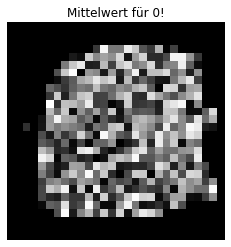

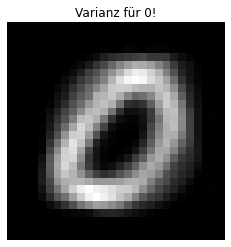

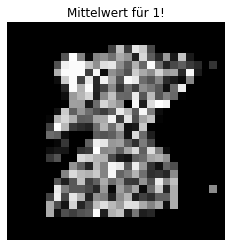

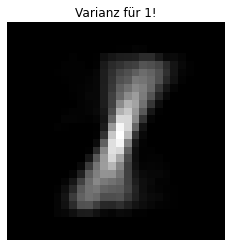

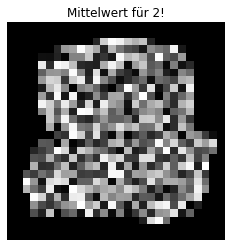

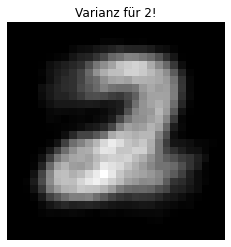

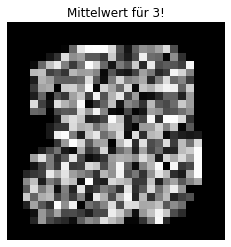

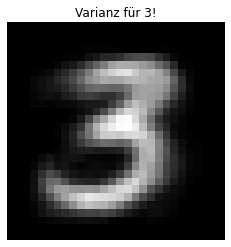

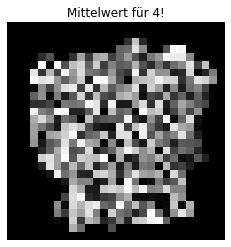

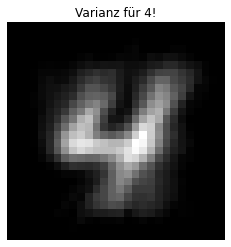

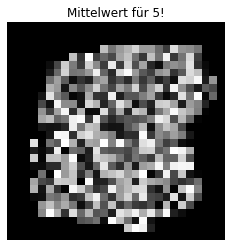

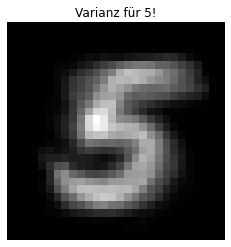

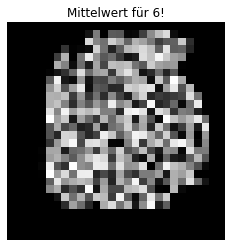

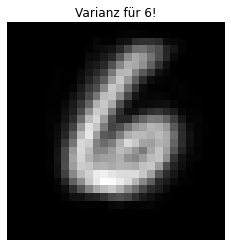

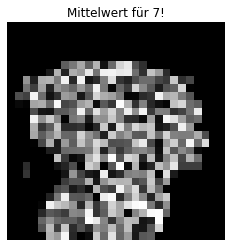

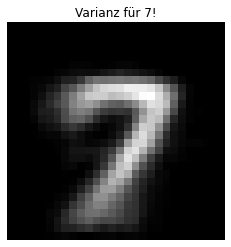

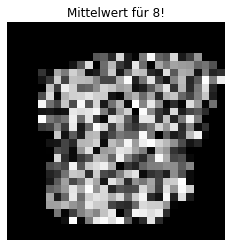

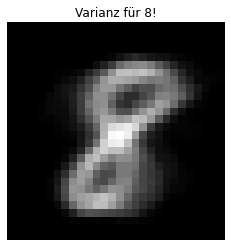

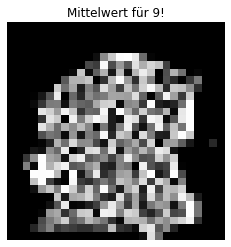

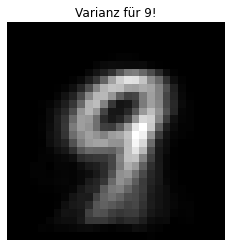

In [63]:
#Aufgabe 1

def mean(A):
    # A as set of pictures
    N = len(A)
    pxl = np.copy(A[0])
    for i in range(1, N):
        pxl += A[i]
    b = (1/N) * pxl
    return b

def variance(A):
    # A as set of pictures
    N = len(A)
    # mean for squared difference
    b = mean(A)
    pxl = np.square(A[0] - b)
    for i in range(1, N):
        pxl += np.square(A[i] - b)
    V = (1/N) * pxl
    return V

numbers = load_data(n=100)

for i in range(10):
    display(mean(numbers[i]), "Mittelwert für " + str(i) + "!")

    display(variance(numbers[i]), "Varianz für " + str(i) + "!")

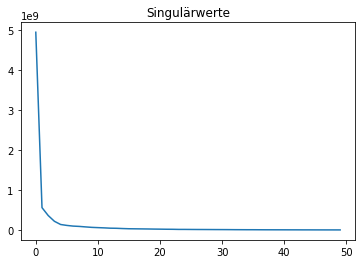

C:\Users\Maxime Vorwerk\PythonEnvs\py39\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


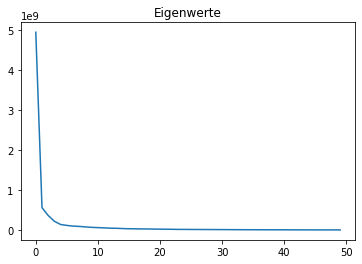

In [85]:
#Aufgabe 2

def calc_Y(A):
    N = len(A)
    A = np.array(A)

    b = mean(A)
    (n, m) = b.shape
    b_vec = b.reshape(n*m, 1)

    A_ = A.reshape(N, m*n).transpose()
    Y = A_ + b_vec
    
    return Y

def singular_values(Y):
    V, S, U = linalg.svd(Y)
    return V, S, U

def eigenvalues(S):
    W, V = linalg.eig(S)
    return W.real, V.real

numbers = load_data(n=1000)

Y = calc_Y(numbers[0])
_, sVals, _ = singular_values(Y)
S = Y @ Y.T
eigVals, _ = eigenvalues(S)

plot(sVals[:50]**2, 'Singulärwerte')
plot(eigVals[:50], 'Eigenwerte')


In [26]:
#Aufgabe 3

In [27]:
#Aufgabe 4